In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

 # module for stats models/# module for presenting stats models outputs nicely
import statsmodels.formula.api as sm
from statsmodels.iolib.summary2 import summary_col 

In [2]:
def price2ret(prices,retType='simple'):
    if retType == 'simple':
        ret = (prices/prices.shift(1))-1
    else:
        ret = np.log(prices/prices.shift(1))
    return ret

In [3]:
df_stk = pd.read_csv("F.csv")
df_stk.head()

Date      Open      High       Low     Close  Adj Close   Volume
0  1972-07-03  2.072119  2.072119  2.051844  2.064009   0.002740   438200
1  1972-07-05  2.064009  2.068064  2.031569  2.051844   0.002724  1395000
2  1972-07-06  2.059954  2.096449  2.059954  2.076174   0.002756  1173500
3  1972-07-07  2.076174  2.088339  2.051844  2.068064   0.002746  1351100
4  1972-07-10  2.068064  2.072119  2.043734  2.043734   0.002713   523700

In [4]:
df_stk['Returns'] = price2ret(df_stk[['Adj Close']])
df_stk = df_stk.dropna()
df_stk.head()

Date      Open      High       Low     Close  Adj Close   Volume  \
1  1972-07-05  2.064009  2.068064  2.031569  2.051844   0.002724  1395000   
2  1972-07-06  2.059954  2.096449  2.059954  2.076174   0.002756  1173500   
3  1972-07-07  2.076174  2.088339  2.051844  2.068064   0.002746  1351100   
4  1972-07-10  2.068064  2.072119  2.043734  2.043734   0.002713   523700   
5  1972-07-11  2.043734  2.059954  2.031569  2.031569   0.002697   546600   

    Returns  
1 -0.005839  
2  0.011747  
3 -0.003628  
4 -0.012017  
5 -0.005898

In [5]:
df_stk['Date'] = pd.to_datetime(df_stk['Date'])
df_stk['Date'] = df_stk['Date'].dt.strftime("%Y%m%d")
df_stk = df_stk.rename(columns={"Date":"date"})
df_stk

date      Open      High       Low     Close  Adj Close    Volume  \
1      19720705  2.064009  2.068064  2.031569  2.051844   0.002724   1395000   
2      19720706  2.059954  2.096449  2.059954  2.076174   0.002756   1173500   
3      19720707  2.076174  2.088339  2.051844  2.068064   0.002746   1351100   
4      19720710  2.068064  2.072119  2.043734  2.043734   0.002713    523700   
5      19720711  2.043734  2.059954  2.031569  2.031569   0.002697    546600   
...         ...       ...       ...       ...       ...        ...       ...   
12165  20200928  6.590000  6.770000  6.580000  6.690000   6.690000  47582600   
12166  20200929  6.690000  6.700000  6.540000  6.600000   6.600000  38987300   
12167  20200930  6.610000  6.750000  6.590000  6.660000   6.660000  55809500   
12168  20201001  6.710000  6.770000  6.630000  6.750000   6.750000  58340600   
12169  20201002  6.620000  6.930000  6.600000  6.890000   6.890000  60748000   

        Returns  
1     -0.005839  
2      0.011747  
3     -0.003628  
4     -0.012017  
5     -0.005898  
...         ...  
12165  0.027650  
12166 -0.013453  
12167  0.009091  
12168  0.013514  
12169  0.020741  

[12169 rows x 8 columns]

In [6]:
# Data source https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
df_factors = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily_20201003.csv")
df_factors = df_factors.rename(columns={'Unnamed: 0':'date'})
df_factors['date'] = df_factors['date'].astype(str)
df_factors.head()

date  Mkt-RF   SMB   HML   RMW   CMA     RF
0  19630701   -0.67  0.00 -0.32 -0.01  0.15  0.012
1  19630702    0.79 -0.27  0.27 -0.07 -0.19  0.012
2  19630703    0.63 -0.17 -0.09  0.17 -0.33  0.012
3  19630705    0.40  0.08 -0.28  0.08 -0.33  0.012
4  19630708   -0.63  0.04 -0.18 -0.29  0.13  0.012

In [7]:
# Mkt/Mkt-RF -  the excess return on the market, value-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ that have a CRSP share code of 10 or 11 at the beginning of month t, good shares and price data at the beginning of t, and good return data for t minus the one-month Treasury bill rate (from Ibbotson Associates)
# SMB - Small Minus Big is the average return on the three small portfolios minus the average return on the three big portfolio
# HML - High Minus Low is the average return on the two value portfolios minus the average return on the two growth portfolios 
# RMW - The profitability factor is the difference between the returns of firms with robust (high) and weak (low) operating profitability
# CMA - The investment factor is the difference between the returns of firms that invest conservatively and firms that invest aggressively
# df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
df_factors['MKT'] = df_factors['MKT']/100
df_factors['SMB'] = df_factors['SMB']/100
df_factors['HML'] = df_factors['HML']/100
df_factors['RMW'] = df_factors['RMW']/100
df_factors['CMA'] = df_factors['CMA']/100
df_factors

date     MKT     SMB     HML     RMW     CMA     RF
0      19630701 -0.0067  0.0000 -0.0032 -0.0001  0.0015  0.012
1      19630702  0.0079 -0.0027  0.0027 -0.0007 -0.0019  0.012
2      19630703  0.0063 -0.0017 -0.0009  0.0017 -0.0033  0.012
3      19630705  0.0040  0.0008 -0.0028  0.0008 -0.0033  0.012
4      19630708 -0.0063  0.0004 -0.0018 -0.0029  0.0013  0.012
...         ...     ...     ...     ...     ...     ...    ...
14386  20200825  0.0036 -0.0001 -0.0063 -0.0045 -0.0069  0.000
14387  20200826  0.0101 -0.0166 -0.0174 -0.0009 -0.0084  0.000
14388  20200827  0.0018 -0.0003  0.0099  0.0055 -0.0046  0.000
14389  20200828  0.0070  0.0040 -0.0021  0.0016 -0.0009  0.000
14390  20200831 -0.0005 -0.0093 -0.0176 -0.0064 -0.0014  0.000

[14391 rows x 7 columns]

In [8]:
df_factors[df_factors['date'] == '19720705']

date     MKT     SMB     HML     RMW    CMA     RF
2245  19720705  0.0055 -0.0011 -0.0014  0.0027 -0.001  0.016

In [9]:
#df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Merging the stock and factor returns dataframes together
df_stock_factor = pd.merge(df_stk,df_factors,on='date',how='left')
df_stock_factor

date      Open      High       Low     Close  Adj Close    Volume  \
0      19720705  2.064009  2.068064  2.031569  2.051844   0.002724   1395000   
1      19720706  2.059954  2.096449  2.059954  2.076174   0.002756   1173500   
2      19720707  2.076174  2.088339  2.051844  2.068064   0.002746   1351100   
3      19720710  2.068064  2.072119  2.043734  2.043734   0.002713    523700   
4      19720711  2.043734  2.059954  2.031569  2.031569   0.002697    546600   
...         ...       ...       ...       ...       ...        ...       ...   
12164  20200928  6.590000  6.770000  6.580000  6.690000   6.690000  47582600   
12165  20200929  6.690000  6.700000  6.540000  6.600000   6.600000  38987300   
12166  20200930  6.610000  6.750000  6.590000  6.660000   6.660000  55809500   
12167  20201001  6.710000  6.770000  6.630000  6.750000   6.750000  58340600   
12168  20201002  6.620000  6.930000  6.600000  6.890000   6.890000  60748000   

        Returns     MKT     SMB     HML     RMW     CMA     RF  
0     -0.005839  0.0055 -0.0011 -0.0014  0.0027 -0.0010  0.016  
1      0.011747  0.0076 -0.0038 -0.0035  0.0017 -0.0034  0.016  
2     -0.003628 -0.0032  0.0015 -0.0023  0.0010 -0.0022  0.016  
3     -0.012017 -0.0055 -0.0009  0.0019 -0.0006 -0.0017  0.016  
4     -0.005898 -0.0075 -0.0004  0.0021 -0.0012  0.0010  0.016  
...         ...     ...     ...     ...     ...     ...    ...  
12164  0.027650     NaN     NaN     NaN     NaN     NaN    NaN  
12165 -0.013453     NaN     NaN     NaN     NaN     NaN    NaN  
12166  0.009091     NaN     NaN     NaN     NaN     NaN    NaN  
12167  0.013514     NaN     NaN     NaN     NaN     NaN    NaN  
12168  0.020741     NaN     NaN     NaN     NaN     NaN    NaN  

[12169 rows x 14 columns]

In [10]:
df_stock_factor = df_stock_factor.dropna()

In [11]:
df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns
df_stock_factor

<ipython-input-11-a73ff8e31c0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns


date      Open      High       Low     Close  Adj Close    Volume  \
0      19720705  2.064009  2.068064  2.031569  2.051844   0.002724   1395000   
1      19720706  2.059954  2.096449  2.059954  2.076174   0.002756   1173500   
2      19720707  2.076174  2.088339  2.051844  2.068064   0.002746   1351100   
3      19720710  2.068064  2.072119  2.043734  2.043734   0.002713    523700   
4      19720711  2.043734  2.059954  2.031569  2.031569   0.002697    546600   
...         ...       ...       ...       ...       ...        ...       ...   
12141  20200825  7.010000  7.100000  6.860000  6.940000   6.940000  49550000   
12142  20200826  6.940000  6.970000  6.770000  6.820000   6.820000  48600100   
12143  20200827  6.830000  6.980000  6.830000  6.910000   6.910000  45740900   
12144  20200828  6.930000  6.950000  6.860000  6.940000   6.940000  39936900   
12145  20200831  6.900000  6.930000  6.790000  6.820000   6.820000  50089500   

        Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet  
0     -0.005839  0.0055 -0.0011 -0.0014  0.0027 -0.0010  0.016 -0.021839  
1      0.011747  0.0076 -0.0038 -0.0035  0.0017 -0.0034  0.016 -0.004253  
2     -0.003628 -0.0032  0.0015 -0.0023  0.0010 -0.0022  0.016 -0.019628  
3     -0.012017 -0.0055 -0.0009  0.0019 -0.0006 -0.0017  0.016 -0.028017  
4     -0.005898 -0.0075 -0.0004  0.0021 -0.0012  0.0010  0.016 -0.021898  
...         ...     ...     ...     ...     ...     ...    ...       ...  
12141 -0.005731  0.0036 -0.0001 -0.0063 -0.0045 -0.0069  0.000 -0.005731  
12142 -0.017291  0.0101 -0.0166 -0.0174 -0.0009 -0.0084  0.000 -0.017291  
12143  0.013196  0.0018 -0.0003  0.0099  0.0055 -0.0046  0.000  0.013196  
12144  0.004342  0.0070  0.0040 -0.0021  0.0016 -0.0009  0.000  0.004342  
12145 -0.017291 -0.0005 -0.0093 -0.0176 -0.0064 -0.0014  0.000 -0.017291  

[12146 rows x 15 columns]

In [12]:
df_stock_factor_orig = df_stock_factor
df_stock_factor.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'MKT', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'XsRet'],
      dtype='object')

In [13]:
df_stock_factor = df_stock_factor[['MKT', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'XsRet']]
df_stock_factor.head()

MKT     SMB     HML     RMW     CMA     RF     XsRet
0  0.0055 -0.0011 -0.0014  0.0027 -0.0010  0.016 -0.021839
1  0.0076 -0.0038 -0.0035  0.0017 -0.0034  0.016 -0.004253
2 -0.0032  0.0015 -0.0023  0.0010 -0.0022  0.016 -0.019628
3 -0.0055 -0.0009  0.0019 -0.0006 -0.0017  0.016 -0.028017
4 -0.0075 -0.0004  0.0021 -0.0012  0.0010  0.016 -0.021898

# OLS

In [14]:
FF5 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
FF5

In [15]:
FF5tstat = FF5.tvalues
FF5tstat

Intercept   -69.724750
MKT          34.936953
SMB          -2.194765
HML           6.998117
RMW           1.731347
CMA           1.264048
dtype: float64

In [16]:
FF5coeff = FF5.params
FF5coeff

Intercept   -0.017216
MKT          1.243029
SMB         -0.137037
HML          0.539315
RMW          0.132221
CMA          0.123614
dtype: float64

In [17]:
FF5.pvalues

Intercept     0.000000e+00
MKT          2.043644e-267
SMB           2.818048e-02
HML           2.594248e-12
RMW           8.338985e-02
CMA           2.062128e-01
dtype: float64

## Linear Regression

#### https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

(9109, 7)
(3037, 7)


In [19]:
# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

In [20]:
X_test.head()

MKT     SMB     HML     RMW     CMA     RF
9605 -0.0036  0.0040  0.0064 -0.0017 -0.0011  0.001
3852  0.0005  0.0026 -0.0023 -0.0018 -0.0012  0.027
4816  0.0047 -0.0055 -0.0031  0.0017 -0.0030  0.022
5488  0.0003  0.0025  0.0008  0.0012 -0.0002  0.012
8249  0.0001 -0.0084 -0.0014  0.0003  0.0010  0.010

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [22]:
print(regressor.intercept_)
print(regressor.coef_)

-9.558892863868046e-05
[ 1.2331122  -0.22898359  0.574232    0.15190613  0.23476041 -0.96881507]


In [23]:
coeff_df = pd.DataFrame(regressor.coef_, X_test.columns, columns=['Coefficient'])
coeff_df

Coefficient
MKT     1.233112
SMB    -0.228984
HML     0.574232
RMW     0.151906
CMA     0.234760
RF     -0.968815

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

In [26]:
df['err'] = df['Actual'] - df['Predicted']
df

Actual  Predicted       err
9605   0.003648  -0.003261  0.006908
3852  -0.033236  -0.028108 -0.005128
4816   0.062760  -0.016581  0.079341
5488   0.016398  -0.011329  0.027727
8249  -0.007569  -0.008261  0.000692
...         ...        ...       ...
11075 -0.029169  -0.001607 -0.027562
8370   0.009564  -0.001721  0.011285
11873 -0.010222  -0.016032  0.005810
5296   0.010500  -0.003080  0.013581
8172   0.000037  -0.000264  0.000301

[3037 rows x 3 columns]

In [27]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.012459277767694961
Mean Squared Error: 0.0003766112325219719
Root Mean Squared Error: 0.019406473984780747


# Support Vector Machine

#### https://scikit-learn.org/stable/modules/svm.html#regression

In [28]:
from sklearn import svm

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(9109, 7)
(3037, 7)


In [29]:
regr = svm.SVR()
regr.fit(X_train, Y_train)

SVR()

In [30]:
y_pred = regr.predict(X_test)
y_pred

array([-0.02978779,  0.00413706,  0.02073813, ...,  0.03540873,
        0.00501189,  0.02472385])

In [31]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.033821045098220114
Mean Squared Error: 0.0017634281943048275
Root Mean Squared Error: 0.04199319223760951


In [32]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
9060   0.005413  -0.029788
7613  -0.006000   0.004137
6902   0.019505   0.020738
8357  -0.034236  -0.009475
10454 -0.007260  -0.028575
...         ...        ...
7196  -0.043229   0.060347
7315  -0.023401  -0.023847
4175  -0.026000   0.035409
8051   0.020161   0.005012
3525  -0.025000   0.024724

[3037 rows x 2 columns]

# Random Forest Regressor

#### https://heartbeat.fritz.ai/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

RFReg = RandomForestRegressor()

(9109, 7)
(3037, 7)


In [34]:
RFReg.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
y_pred = RFReg.predict(X_test)
y_pred

array([-0.00174307, -0.00714165, -0.05722162, ..., -0.02339587,
       -0.01068954, -0.01334597])

In [36]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.012935857551738417
Mean Squared Error: 0.00036783282132834584
Root Mean Squared Error: 0.019178968202912944


In [37]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
4730   0.000901  -0.001743
6193  -0.008679  -0.007142
2274  -0.044683  -0.057222
8369  -0.015047  -0.013481
10192 -0.000900  -0.004919
...         ...        ...
4094  -0.041472  -0.040695
10728 -0.006574   0.000695
4388  -0.027353  -0.023396
8133  -0.019285  -0.010690
3397  -0.015776  -0.013346

[3037 rows x 2 columns]

# Multi-layer Perceptron regressor

#### https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

#### https://stackoverflow.com/questions/62131266/mlpregressor-working-but-results-dont-make-any-sense

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(9109, 7)
(3037, 7)


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
X_test_norm

array([[0.44625268, 0.32543641, 0.54387991, 0.30028329, 0.61607143,
        0.54098361],
       [0.50278373, 0.42394015, 0.43648961, 0.35410765, 0.57678571,
        0.01639344],
       [0.15802998, 0.36159601, 0.77829099, 0.47592068, 0.72678571,
        0.44262295],
       ...,
       [0.51605996, 0.41147132, 0.4595843 , 0.39943343, 0.63392857,
        0.        ],
       [0.50192719, 0.48379052, 0.35103926, 0.31161473, 0.48928571,
        0.        ],
       [0.48008565, 0.4201995 , 0.49769053, 0.38668555, 0.58571429,
        0.        ]])

In [48]:
#nnref = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
#nnref = MLPRegressor(hidden_layer_sizes = [4], activation = 'logistic', solver = 'sgd', alpha = 1, learning_rate= 'constant', learning_rate_init= 0.6, max_iter=40000, momentum=0.3).fit(X_train_norm , Y_train)
nnref = MLPRegressor(hidden_layer_sizes = [4], activation = 'tanh', solver = 'sgd', alpha = 1, learning_rate= 'constant', learning_rate_init= 0.2, max_iter=40000, momentum=0.3).fit(X_train_norm , Y_train)

#y_pred = regr.predict(X_test)
y_pred = nnref.predict(X_test_norm)

y_pred

array([-0.01834352, -0.00851958, -0.01948636, ..., -0.00887537,
       -0.00749069, -0.00848656])

In [49]:
nnref.score(X_test_norm, Y_test)

0.13490858348939716

In [50]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.01786487923424536
Mean Squared Error: 0.0006398742796810712
Root Mean Squared Error: 0.025295736393334572


In [51]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
1601  -0.042163  -0.018344
9735  -0.031837  -0.008520
3867  -0.108086  -0.019486
7956  -0.034579  -0.009659
11034 -0.022901  -0.007502
...         ...        ...
3618  -0.013475  -0.015112
11791 -0.008918  -0.012279
10812  0.013752  -0.008875
9211   0.048780  -0.007491
10839  0.013735  -0.008487

[3037 rows x 2 columns]

# XGBoost

#### https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [52]:
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance


# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(9109, 7)
(3037, 7)


In [53]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [54]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)

In [55]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.012953017489584571
Mean Squared Error: 0.0004721915111632321
Root Mean Squared Error: 0.02172996804330904


In [56]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
5588   0.013536  -0.012661
3365  -0.006234  -0.021718
10041 -0.021441   0.002098
7410  -0.014105  -0.013830
6887  -0.048661  -0.024881
...         ...        ...
6216  -0.016109  -0.003997
1305  -0.015123  -0.018497
11989 -0.007091  -0.003208
3197  -0.009321  -0.012710
10445  0.009484   0.003458

[3037 rows x 2 columns]

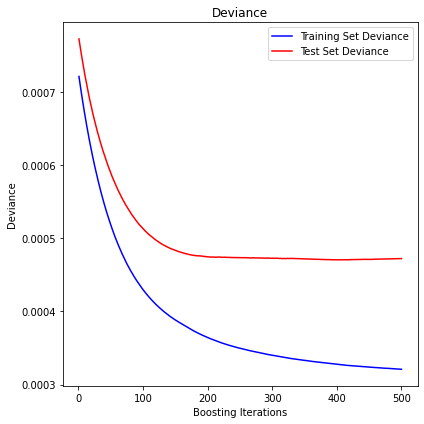

In [57]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(Y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

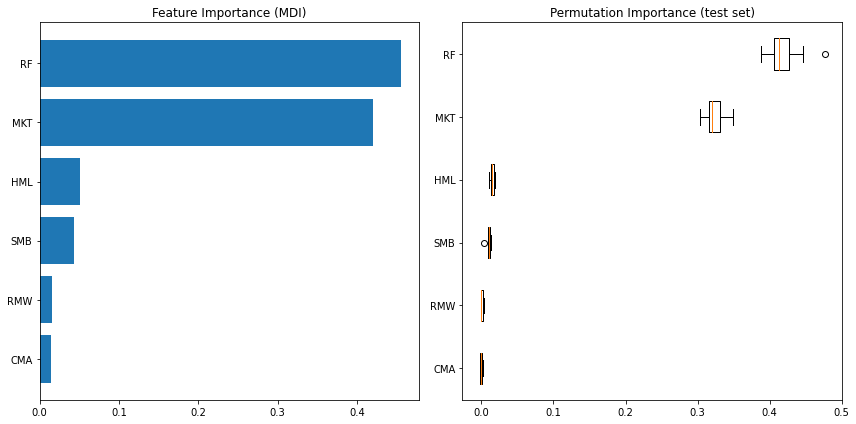

In [58]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df_stock_factor.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, Y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(df_stock_factor.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Catboost

#### https://catboost.ai/docs/concepts/python-usages-examples.html

In [59]:
from catboost import CatBoostRegressor


# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(9109, 7)
(3037, 7)


In [60]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(X_train, Y_train)
# Get predictions
y_pred = model.predict(X_test)

0:	learn: 0.0232125	total: 52.1ms	remaining: 52s
1:	learn: 0.0216206	total: 56.5ms	remaining: 28.2s
2:	learn: 0.0210824	total: 57.9ms	remaining: 19.2s
3:	learn: 0.0208440	total: 59.3ms	remaining: 14.8s
4:	learn: 0.0205317	total: 60.9ms	remaining: 12.1s
5:	learn: 0.0202539	total: 62.3ms	remaining: 10.3s
6:	learn: 0.0201628	total: 63.9ms	remaining: 9.06s
7:	learn: 0.0200960	total: 65.4ms	remaining: 8.11s
8:	learn: 0.0199914	total: 66.9ms	remaining: 7.37s
9:	learn: 0.0199019	total: 68.4ms	remaining: 6.78s
10:	learn: 0.0198135	total: 69.8ms	remaining: 6.27s
11:	learn: 0.0197413	total: 71.2ms	remaining: 5.86s
12:	learn: 0.0196775	total: 72.5ms	remaining: 5.5s
13:	learn: 0.0196422	total: 74ms	remaining: 5.21s
14:	learn: 0.0195821	total: 75.5ms	remaining: 4.96s
15:	learn: 0.0195041	total: 77ms	remaining: 4.74s
16:	learn: 0.0194374	total: 78.5ms	remaining: 4.54s
17:	learn: 0.0193922	total: 79.9ms	remaining: 4.36s
18:	learn: 0.0193359	total: 81.4ms	remaining: 4.2s
19:	learn: 0.0192846	total: 82

229:	learn: 0.0170144	total: 429ms	remaining: 1.44s
230:	learn: 0.0170098	total: 435ms	remaining: 1.45s
231:	learn: 0.0170054	total: 437ms	remaining: 1.45s
232:	learn: 0.0170019	total: 439ms	remaining: 1.44s
233:	learn: 0.0169973	total: 441ms	remaining: 1.44s
234:	learn: 0.0169912	total: 443ms	remaining: 1.44s
235:	learn: 0.0169844	total: 445ms	remaining: 1.44s
236:	learn: 0.0169803	total: 447ms	remaining: 1.44s
237:	learn: 0.0169733	total: 449ms	remaining: 1.44s
238:	learn: 0.0169681	total: 451ms	remaining: 1.44s
239:	learn: 0.0169633	total: 453ms	remaining: 1.43s
240:	learn: 0.0169615	total: 455ms	remaining: 1.43s
241:	learn: 0.0169582	total: 456ms	remaining: 1.43s
242:	learn: 0.0169544	total: 458ms	remaining: 1.43s
243:	learn: 0.0169472	total: 461ms	remaining: 1.43s
244:	learn: 0.0169391	total: 463ms	remaining: 1.43s
245:	learn: 0.0169356	total: 465ms	remaining: 1.42s
246:	learn: 0.0169292	total: 466ms	remaining: 1.42s
247:	learn: 0.0169273	total: 472ms	remaining: 1.43s
248:	learn: 

461:	learn: 0.0161295	total: 806ms	remaining: 939ms
462:	learn: 0.0161257	total: 808ms	remaining: 938ms
463:	learn: 0.0161250	total: 810ms	remaining: 936ms
464:	learn: 0.0161238	total: 812ms	remaining: 935ms
465:	learn: 0.0161228	total: 814ms	remaining: 933ms
466:	learn: 0.0161199	total: 816ms	remaining: 932ms
467:	learn: 0.0161149	total: 818ms	remaining: 930ms
468:	learn: 0.0161139	total: 820ms	remaining: 928ms
469:	learn: 0.0161090	total: 822ms	remaining: 927ms
470:	learn: 0.0161050	total: 824ms	remaining: 925ms
471:	learn: 0.0161012	total: 826ms	remaining: 924ms
472:	learn: 0.0160977	total: 827ms	remaining: 922ms
473:	learn: 0.0160957	total: 829ms	remaining: 920ms
474:	learn: 0.0160945	total: 832ms	remaining: 919ms
475:	learn: 0.0160906	total: 834ms	remaining: 918ms
476:	learn: 0.0160899	total: 836ms	remaining: 916ms
477:	learn: 0.0160876	total: 837ms	remaining: 914ms
478:	learn: 0.0160858	total: 839ms	remaining: 912ms
479:	learn: 0.0160822	total: 840ms	remaining: 910ms
480:	learn: 

672:	learn: 0.0155963	total: 1.18s	remaining: 574ms
673:	learn: 0.0155939	total: 1.18s	remaining: 573ms
674:	learn: 0.0155896	total: 1.19s	remaining: 571ms
675:	learn: 0.0155876	total: 1.19s	remaining: 570ms
676:	learn: 0.0155849	total: 1.19s	remaining: 568ms
677:	learn: 0.0155824	total: 1.19s	remaining: 566ms
678:	learn: 0.0155805	total: 1.19s	remaining: 565ms
679:	learn: 0.0155791	total: 1.2s	remaining: 563ms
680:	learn: 0.0155788	total: 1.2s	remaining: 561ms
681:	learn: 0.0155785	total: 1.2s	remaining: 560ms
682:	learn: 0.0155778	total: 1.2s	remaining: 558ms
683:	learn: 0.0155758	total: 1.21s	remaining: 557ms
684:	learn: 0.0155743	total: 1.21s	remaining: 555ms
685:	learn: 0.0155722	total: 1.21s	remaining: 554ms
686:	learn: 0.0155693	total: 1.21s	remaining: 552ms
687:	learn: 0.0155658	total: 1.21s	remaining: 550ms
688:	learn: 0.0155634	total: 1.21s	remaining: 548ms
689:	learn: 0.0155613	total: 1.22s	remaining: 547ms
690:	learn: 0.0155596	total: 1.22s	remaining: 545ms
691:	learn: 0.01

910:	learn: 0.0151637	total: 1.56s	remaining: 152ms
911:	learn: 0.0151634	total: 1.56s	remaining: 151ms
912:	learn: 0.0151624	total: 1.56s	remaining: 149ms
913:	learn: 0.0151606	total: 1.56s	remaining: 147ms
914:	learn: 0.0151586	total: 1.57s	remaining: 145ms
915:	learn: 0.0151582	total: 1.57s	remaining: 144ms
916:	learn: 0.0151567	total: 1.57s	remaining: 142ms
917:	learn: 0.0151563	total: 1.57s	remaining: 140ms
918:	learn: 0.0151540	total: 1.57s	remaining: 139ms
919:	learn: 0.0151527	total: 1.57s	remaining: 137ms
920:	learn: 0.0151508	total: 1.58s	remaining: 135ms
921:	learn: 0.0151476	total: 1.58s	remaining: 134ms
922:	learn: 0.0151460	total: 1.58s	remaining: 132ms
923:	learn: 0.0151456	total: 1.58s	remaining: 130ms
924:	learn: 0.0151446	total: 1.59s	remaining: 129ms
925:	learn: 0.0151419	total: 1.59s	remaining: 127ms
926:	learn: 0.0151409	total: 1.59s	remaining: 125ms
927:	learn: 0.0151383	total: 1.59s	remaining: 123ms
928:	learn: 0.0151360	total: 1.59s	remaining: 122ms
929:	learn: 

In [61]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
7083  -0.011188  -0.021595
10401  0.004654  -0.003163
3490  -0.054465  -0.045717
7311  -0.016244  -0.023061
8082  -0.005000  -0.006833
...         ...        ...
769   -0.019067  -0.012496
528   -0.038436  -0.035726
1928  -0.023418  -0.068606
101   -0.035403  -0.019367
4353  -0.035444  -0.033319

[3037 rows x 2 columns]

In [62]:
compare[compare['Predicted'] > 0.0]

Actual  Predicted
11345 -0.011945   0.015214
9794  -0.005135   0.001784
6421   0.009977   0.007678
11663 -0.000432   0.001543
12057  0.061602   0.037108
...         ...        ...
9135   0.062621   0.038830
7978   0.014373   0.010811
9751   0.024170   0.028311
8494  -0.018509   0.009556
10786 -0.001877   0.004850

[564 rows x 2 columns]

In [69]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.01662331268654421
Mean Squared Error: 0.0005982511454146772
Root Mean Squared Error: 0.024459173032109593


# Lightgbm

#### https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [63]:
import lightgbm as lgb


# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(9109, 7)
(3037, 7)


In [64]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

In [66]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.02,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('lgbm-model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l2: 0.000763971	valid_0's l1: 0.0194825
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.000751372	valid_0's l1: 0.01928
[3]	valid_0's l2: 0.000739234	valid_0's l1: 0.0190849
[4]	valid_0's l2: 0.000727499	valid_0's l1: 0.0188941
[5]	valid_0's l2: 0.00071623	valid_0's l1: 0.0187095
[6]	valid_0's l2: 0.000708285	valid_0's l1: 0.0185721
[7]	valid_0's l2: 0.000697745	valid_0's l1: 0.0183942
[8]	valid_0's l2: 0.000687592	valid_0's l1: 0.0182203
[9]	valid_0's l2: 0.000677848	valid_0's l1: 0.0180539
[10]	valid_0's l2: 0.000672166	valid_0's l1: 0.0179679
[11]	valid_0's l2: 0.000666301	valid_0's l1: 0.017883
[12]	valid_0's l2: 0.000656779	valid_0's l1: 0.0177203
[13]	valid_0's l2: 0.000647594	valid_0's l1: 0.0175605
[14]	valid_0's l2: 0.000638846	valid_0's l1: 0.0174058
[15]	valid_0's l2:

In [67]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
3953  -0.003226  -0.013687
3834  -0.014898  -0.017819
12001 -0.100771  -0.004969
1017  -0.045386  -0.020367
8290   0.008467  -0.013622
...         ...        ...
11130 -0.005843  -0.010025
7213  -0.030609  -0.014997
7304  -0.013000  -0.014107
532   -0.036068  -0.022592
2902  -0.045661  -0.020989

[3037 rows x 2 columns]

In [68]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.01662331268654421
Mean Squared Error: 0.0005982511454146772
Root Mean Squared Error: 0.024459173032109593
